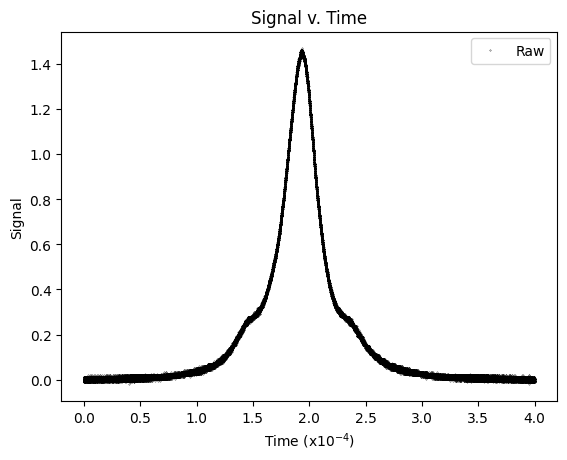

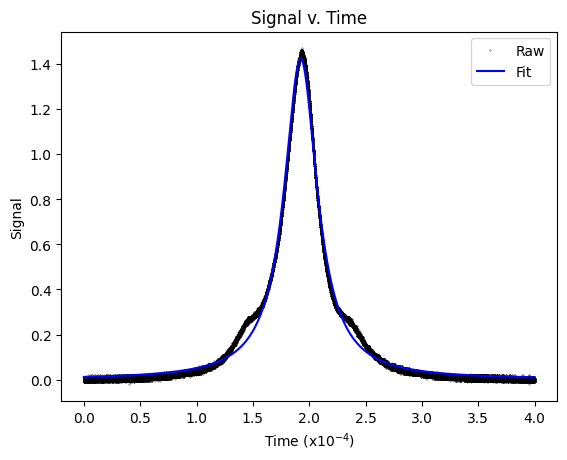

[1.42281068e+00 1.79236908e-05 1.92358649e-04]
Part b
0.02523344255292435
[4.25479046e-04 7.58809725e-09 5.35834557e-09]


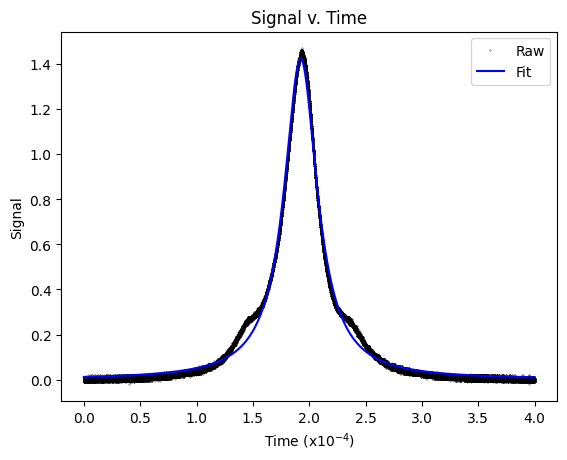

[1.42281068e+00 1.79236908e-05 1.92358649e-04]
[4.25479082e-04 7.58809783e-09 5.35834639e-09]


In [155]:
##############Assignment 4#################
###########################################
#################Problem 1#################
###########################################

import numpy as np
from matplotlib import pyplot as plt


#Parts of the code in this assignment were adapted from the lecture notes.

#################Part a#################
stuff=np.load('sidebands.npz')
t=stuff['time']
d=stuff['signal']
#initial plots
plt.clf();
plt.plot(t*1e4,d,'.k', ms=0.5,label='Raw')
plt.xlabel('Time (x$10^{-4}$)')
plt.ylabel('Signal')
plt.legend()
plt.title('Signal v. Time')
plt.show()

def calc_lorentz(p,t):
#     y=p[0]*p[1]**2/(p[1]**2+(t-p[2])**2)
    a=p[0]
    w=p[1]
    t0=p[2]
    y=a/(1+(t-t0)**2/(w**2))
    
    grad=np.zeros([len(t),len(p)])
    #now differentiate w.r.t. all the parameters

    grad[:,0]=1/(1+((t-t0)**2)/(w**2))
    grad[:,1]=(2*p[0]*(t-t0)**2)/((w**3)*((1+((t-t0)**2)/(w**2)))**2)
    grad[:,2]=(2*p[0]*(t-t0))/((w**2)*(1+((t-t0)**2/(w)**2))**2)

    return y,grad

# Newton's method initial guesses
#a = 1.4; w=1e-4; t0=2e-4
p0=np.array([1.4,1e-5,2e-4]) #starting guess, close but not exact

niter=10#number of iterations
p=p0.copy()

for j in range(niter):
    pred,grad=calc_lorentz(p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
#     print p,err
plt.plot(t*1e4,d,'.k', ms=0.5,label='Raw')
plt.plot(t*1e4,pred,'-b', ms=0.01,label='Fit')
plt.xlabel('Time (x$10^{-4}$)')
plt.ylabel('Signal')
plt.legend()
plt.title('Signal v. Time')
plt.show()
print(p)

#################Part b#################
print ('Part b')
#RMSE error
rmse=np.sqrt(err/len(d))
print(rmse)
#Errors on each parameter
errf=np.sqrt(np.diag(np.linalg.inv(lhs)*rmse**2))
print(errf)



#################Part c#################
#helper function to differentiate numerically
def numdiff (f,x):
    h=1e-8#1e-16^0.5
    dx=(f(x+h)-f(x-h))/(2*h)
    return dx

#calculator with numerical differential
def ncalc_lorentz(p,t):
#     y=p[0]*p[1]**2/(p[1]**2+(t-p[2])**2)
    a=p[0]
    w=p[1]
    t0=p[2]
    y=a/(1+(t-t0)**2/(w**2))
    
    grad=np.zeros([len(t),len(p)])
    #now differentiate w.r.t. all the parameters

    lor1=lambda a:a/(1+((t-t0)**2)/(w**2))
    grad[:,0]=numdiff(lor1,a)
    lor2=lambda w:a/(1+((t-t0)**2)/(w**2))
    grad[:,1]=numdiff(lor2,w)
    lor3=lambda t0:a/(1+((t-t0)**2)/(w**2))
    grad[:,2]=numdiff(lor3,t0)
  
    return y,grad

p0=np.array([1.4,1e-5,2e-4]) #starting guess, close but not exact

niter=10#number of iterations
p=p0.copy()

for j in range(niter):
    pred,grad=ncalc_lorentz(p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
#     print p,err
plt.plot(t*1e4,d,'.k', ms=0.5,label='Raw')
plt.plot(t*1e4,pred,'-b', ms=0.01,label='Fit')
plt.xlabel('Time (x$10^{-4}$)')
plt.ylabel('Signal')
plt.legend()
plt.title('Signal v. Time')
plt.show()
print(p)
#RMSE error
rmse=np.sqrt(err/len(d))
#Errors on each parameter
errf=np.sqrt(np.diag(np.linalg.inv(lhs)*rmse**2))
print(errf)


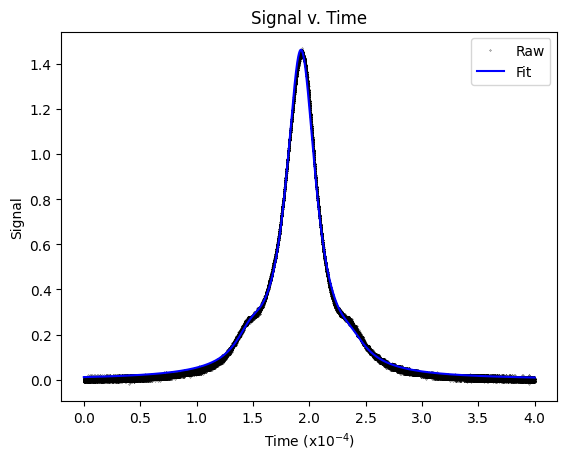

a = 1.4429924153247184 +/- 0.00026642860273434445
w = 1.6065106857688482e-05 +/- 5.649262460800723e-09
to = 0.0001925785211054561 +/- 3.1544025525186014e-09
b = 0.103910818499448 +/- 0.00025411629662867966
c = 0.06473265640844601 +/- 0.00024882284147839136
dt = 4.4567134805970716e-05 +/- 3.802695846873607e-08


In [156]:
#################Part d#################
#Three Lorentzians

Params = ['a','w','to', 'b', 'c','dt']

def ncalc_lorentz3(p,t):
    a=p[0]
    w=p[1]
    t0=p[2]
    b=p[3]
    c=p[4]
    dt=p[5]
    y=a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    
    grad=np.zeros([len(t),len(p)])
    #now differentiate w.r.t. all the parameters

    lor1=lambda a:a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    grad[:,0]=numdiff(lor1,a)
    lor2=lambda w:a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    grad[:,1]=numdiff(lor2,w)
    lor3=lambda t0:a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    grad[:,2]=numdiff(lor3,t0)
    lor4=lambda b:a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    grad[:,3]=numdiff(lor4,b)
    lor5=lambda c:a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    grad[:,4]=numdiff(lor5,c)
    lor6=lambda dt:a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    grad[:,5]=numdiff(lor6,dt)
  
    return y,grad

p0=np.array([1.4,1.7e-5,2e-4, 1e-1, 1e-1,4e-5]) #starting guess, close but not exact

niter=10#number of iterations
p=p0.copy()

for j in range(niter):
    pred,grad=ncalc_lorentz3(p,t)
    r=d-pred
    err=(r**2).sum()
    r=np.matrix(r).transpose()
    grad=np.matrix(grad)

    lhs=grad.transpose()*grad
    rhs=grad.transpose()*r
    dp=np.linalg.inv(lhs)*(rhs)
    for jj in range(p.size):
        p[jj]=p[jj]+dp[jj]
#     print p,err
plt.plot(t*1e4,d,'.k', ms=0.5,label='Raw')
plt.plot(t*1e4,pred,'-b', ms=0.01,label='Fit')
plt.xlabel('Time (x$10^{-4}$)')
plt.ylabel('Signal')
plt.legend()
plt.title('Signal v. Time')
plt.show()

    
#RMSE error
rmse=np.sqrt(err/len(d))
#Errors on each parameter
errf=np.sqrt(np.diag(np.linalg.inv(lhs)*rmse**2))
# print(errf)

for i in range(len(Params)):
    print("{} = {} +/- {}".format(Params[i],p[i],errf[i]))
#     print("{} ".format(Params[i],p[i],errf[i])


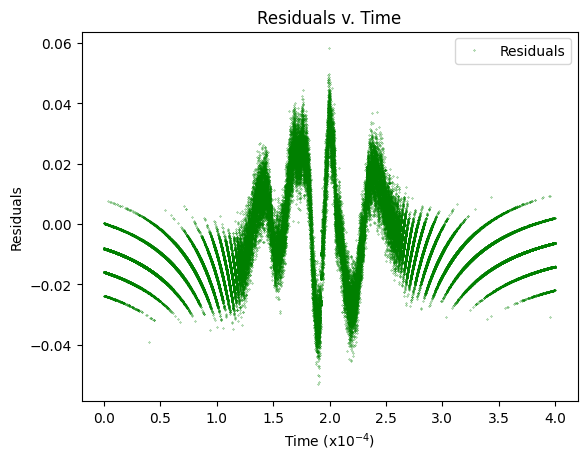

In [157]:
#################Part e#################
plt.plot(t*1e4,r,'.g', ms=0.5,label='Residuals')
plt.xlabel('Time (x$10^{-4}$)')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals v. Time')
plt.show()

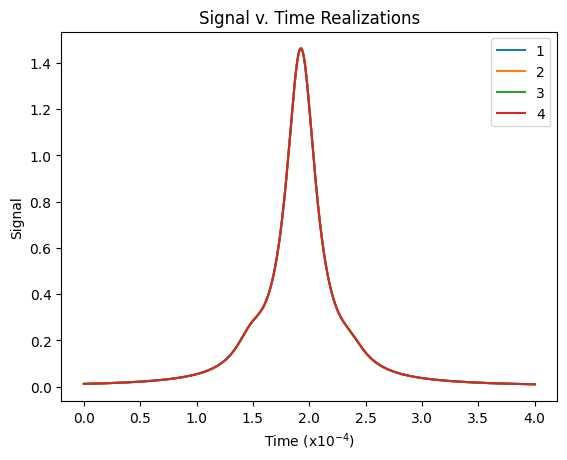

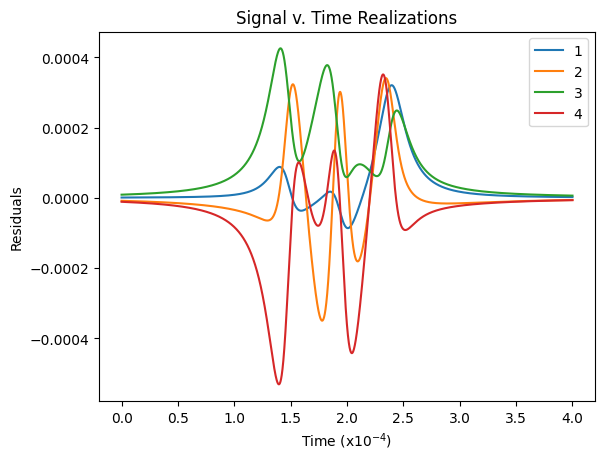

Best-fit part d
509.88641179609886
Realization 1
510.03270911049844
Realization 2
509.22394401991517
Realization 3
510.68868806376764
Realization 4
508.8405020955167


In [167]:
#################Part f#################
def trilor(p,t):
    a=p[0]
    w=p[1]
    t0=p[2]
    b=p[3]
    c=p[4]
    dt=p[5]
    return a/(1+(t-t0)**2/w**2)+b/(1+(t-t0+dt)**2/w**2)+c/(1+(t-t0-dt)**2/w**2)
    
    
#Cholesky decomposition

chole=np.linalg.cholesky(np.linalg.inv(lhs)*rmse**2)

prands=[]
#set up 4 realizations with perturbances
for i in range(4):
    prand=p+chole@np.random.randn(len(p))
    prand=np.ravel(prand).T
    prands.append(prand)
    plt.plot(t*1e4,trilor(prand,t), ms=0.5,label=i+1)
    plt.xlabel('Time (x$10^{-4}$)')
    plt.ylabel('Signal')
    plt.title('Signal v. Time Realizations')
# plt.plot(t*1e4,d,'.g', ms=0.5,label='Raw')
# plt.plot(t*1e4,pred,'--b', ms=0.01,label='Fit')
plt.legend()
plt.show()
    
    #residuals
for k in range(4):
    plt.plot(t*1e4,trilor(prands[k],t)-trilor(p,t), ms=0.5,label=k+1)
    plt.xlabel('Time (x$10^{-4}$)')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Signal v. Time Realizations')
plt.show()

#chi-square for part d
print ('Best-fit part d')
print(np.sum(((d-pred)**2)/pred))
for i in range(4):
    print('Realization {}'.format(i+1))
    print(np.sum(((d-trilor(prands[i],t))**2)/trilor(prands[i],t)))
    


In [127]:
#################Part g#################
def lor_chisq(pars,x,y,noise=None):
    pred=trilor(pars,x)
    if noise is None:
        return np.sum((y-pred)**2)
    else:
        return np.sum (((y-pred)/noise)**2)

def mcmc(pars,step_size,x,y,fun,nstep=1000,noise=rmse):
    chi_cur=fun(pars,x,y,noise)
    npar=len(pars)
    chain=np.zeros([nstep,npar])
    chivec=np.zeros(nstep)
    for i in range(nstep):
        trial_pars=pars+step_size*np.random.randn(npar)
        trial_chisq=fun(trial_pars,x,y,noise)
        delta_chisq=trial_chisq-chi_cur
        accept_prob=np.exp(-0.5*delta_chisq)
        accept=np.random.rand(1)<accept_prob
        if accept:
            pars=trial_pars
            chi_cur=trial_chisq
        chain[i,:]=pars
        chivec[i]=chi_cur
    return chain,chivec
#from part d best fit
pars = np.array([1.44299242e+00, 1.60651069e-05, 1.92578521e-04, 1.03910818e-01,
 6.47326564e-02, 4.45671348e-05])
step_size=np.array([2.66428603e-04, 5.64926246e-09, 3.15440255e-09, 2.54116297e-04,
2.48822841e-04, 3.80269585e-08])


chain,chisq=mcmc(pars,step_size,t,d,lor_chisq,nstep=30000)

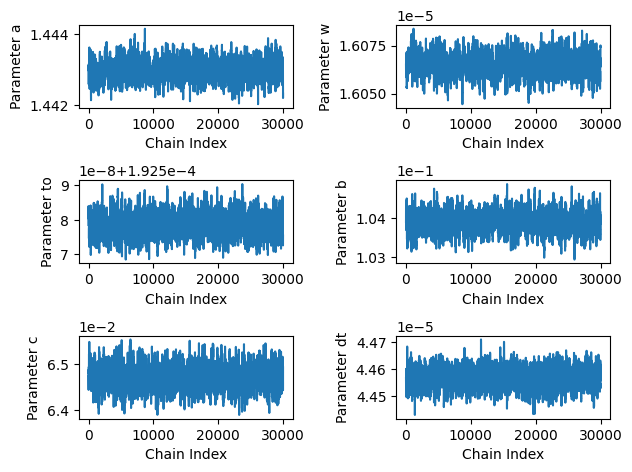

In [128]:

for i in range(len(Params)):
    plt.subplot(3,2,i+1)
    plt.plot(chain[:,i])
    plt.xlabel('Chain Index')
    plt.ylabel('Parameter {}'.format(Params[i]))
#     plt.legend()
#     plt.title('MCMC - parameter')
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.tight_layout(pad=1.0)

In [132]:
#################Part h#################
dx=np.mean(chain[:,5])
w=np.mean(chain[:,1])
dxerr=np.std(chain[:,5])
werr=np.std(chain[:,1])
cav=9*w/dx
# print(cav)
cav_err=cav*np.sqrt((dxerr/dx)**2+(werr/w)**2)
# print(cav_err)
print("Cavity width = {} +/- {}".format(round(cav,3),round(cav_err,3)))

Cavity width = 3.244 +/- 0.003


In [130]:

mcerr= np.std(chain,axis=0)

mcave = np.mean(chain)

for i in range(len(Params)):
    print("{} = {} +/- {}".format(Params[i],np.mean(chain[:,i]),np.std(chain[:,i])))



a = 1.442988334572051 +/- 0.00027092790875009185
w = 1.6065230170419497e-05 +/- 5.5469178313293435e-09
to = 0.00019257861355299213 +/- 3.1894607471916553e-09
b = 0.10391127478571743 +/- 0.0002550971641380439
c = 0.06472443058542014 +/- 0.0002527254619091457
dt = 4.456704013858528e-05 +/- 3.599170081670326e-08
